In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the boston_housing dataset

In [3]:
# Read in the data from the common folder
data=pd.read_csv("data/boston_housing.csv")

# Explore the data by
* Showing the first few rows
* Print the number of rows and columns of this dataset
* Giving a summary of the dataset

In [4]:
# Showing the first 10 rows of the dataset. 
display(data.head(10))
# Print the rows and columns of the dataset
print("The number of rows and columns: ",data.shape)
# Giving a summary of this dataset. 
data.describe()

,Unnamed: 0.1,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,Price
0,0,0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,504.000000
1,1,1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,453.600008
2,2,2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,728.700016
3,3,3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,701.400032
4,4,4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,760.200016
5,5,5,0.02985,0.0,2.18,0,0.458,6.430,58.700001,6.0622,3,222,18.700001,394.119995,5.21,602.700016
6,6,6,0.08829,12.5,7.87,0,0.524,6.012,66.599998,5.5605,5,311,15.200000,395.600006,12.43,480.899992
7,7,7,0.14455,12.5,7.87,0,0.524,6.172,96.099998,5.9505,5,311,15.200000,396.899994,19.15,569.100008
8,8,8,0.21124,12.5,7.87,0,0.524,5.631,100.000000,6.0821,5,311,15.200000,386.630005,29.93,346.500000
9,9,9,0.17004,12.5,7.87,0,0.524,6.004,85.900002,6.5921,5,311,15.200000,386.709992,17.10,396.899992


The number of rows and columns:  (506, 16)


,Unnamed: 0.1,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.0,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,252.500000,3.623075,11.363636,11.136779,0.0,0.782968,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,473.188934
std,146.213884,146.213884,8.600805,23.322453,6.860353,0.0,1.225300,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,193.139186
min,0.000000,0.000000,0.006320,0.000000,0.460000,0.0,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,105.000000
25%,126.250000,126.250000,0.082045,0.000000,5.190000,0.0,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,357.525002
50%,252.500000,252.500000,0.256510,0.000000,9.690000,0.0,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,445.200016
75%,378.750000,378.750000,3.689388,12.500000,18.100000,0.0,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,525.000000
max,505.000000,505.000000,88.976196,100.000000,27.740000,0.0,7.130000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,1050.000000


## Preprocessing
* Check for any NA values in the data, if necessary remove them
* Remove any non informative columns
* Make a histogram of the price column
* Convert all prices <800 to 0, all prices >=800 to 1 (we are making 2 groups)
* Make from these converted prices a barplot. Is this balanced data or not?

In [5]:
# Are there na values?
print("Are there NA values: ",np.any(data.isna()))
# Remove any informative columns. 
data.drop(["Unnamed: 0", "Unnamed: 0.1","CHAS"],axis=1, inplace=True)

Are there NA values:  False


array([[<AxesSubplot: title={'center': 'Price'}>]], dtype=object)

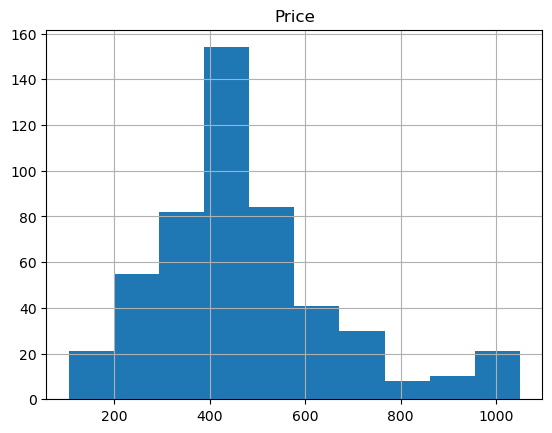

In [6]:
# Make a histogram of the price column
data.hist("Price")

In [7]:
# Convert all prices <800 to 0, all prices >=800 to 1 (we are making 2 groups)
data.loc[data.Price<800,"Price"]=0
data.loc[data.Price>=800,"Price"]=1

<AxesSubplot: xlabel='Price', ylabel='count'>

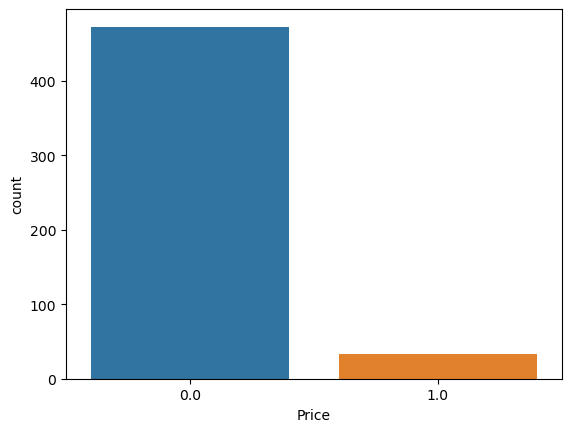

In [8]:
# Make from these converted prices a barplot. Is this balanced data or not?
sns.countplot(data=data, x="Price")

# Clustering
* Use KMeans clustering to cluster the above data
    * Make sure you don't take price into consideration for the clustering
    * Determine the optimal number of clusters for this dataset, discuss why you would suggest this

In [9]:
# Create features and targets (targets just as reference, in clustering we don't need any targets)
features = data.drop("Price",axis=1)

In [10]:
# Clustering is to find if have any groups in your data
from sklearn.cluster import KMeans

# Calculate the wcss for models ranging between 1 and 10 clusters:
wcss = []

for K in range(1, 11):
    # Initialize the model
    model = KMeans(n_clusters=K)
    model.fit(features)
    wcss.append(model.inertia_)


/home/guest/miniconda3/envs/bit07/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/guest/miniconda3/envs/bit07/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

Text(0, 0.5, 'WCSS')

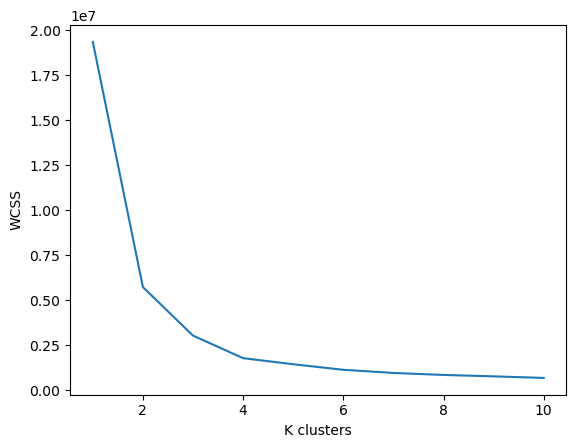

In [11]:

plt.plot(range(1,11), wcss)
plt.xlabel('K clusters')
plt.ylabel("WCSS")
# Have to check where there is not a significant decrease anymore. Here 2 to 3 is already less sign, 4 as well 
# Can choose 3 or 4

In [12]:
model=KMeans(n_clusters=3)
model.fit(features)

/home/guest/miniconda3/envs/bit07/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [14]:
print(model.score(features))

-3034549.2360443473


## Question
Is the best number of clusters in any way related to the steps we did before? (E.g., changing the price column into 2 classes)

-> 

# Dimensionality reduction
* Perform a principal component analysis on the dataset. Compute two PCs.
* Plot the principal components you get, color the points based on the Price classes we made earlier.

In [24]:
from sklearn.decomposition import PCA

PCA_model = PCA(n_components = 2)

features_PCA = PCA_model.fit_transform(features)

In [25]:
features_PCA

array([[-119.81936688,   -5.55992001],
       [-168.8906935 ,   10.11648647],
       [-169.31224051,   14.08080785],
       ...,
       [-138.38756014,    0.93838854],
       [-137.50557582,    4.25209493],
       [-139.19072883,    1.00936036]])

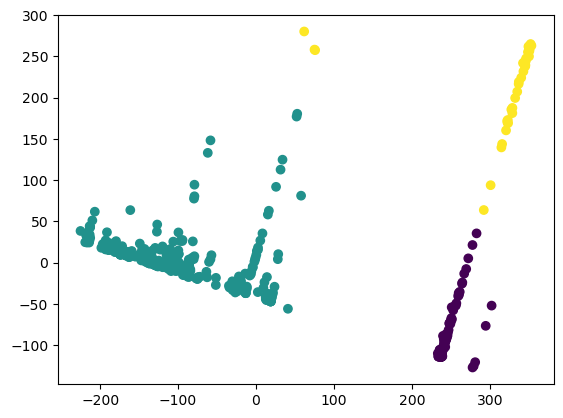

In [30]:
plt.scatter(features_PCA[:,0], features_PCA[:,1], c=predictions) # OR c=data.Price

In [28]:
# Can predict (extra)
# Have to sue original features
predictions = model.predict(features)

In [29]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## Question
Can you see the number of cluster you selected earlier in this plot?

Based on this plot, can you argue that the clusters represent the price classes?

## Classification model on PCA
* Create a classifier (you can choose which one) and train it on the PCA data
    * Check the performance, create a train and test split for this

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_PCA, data.Price, test_size=0.2)

from sklearn.linear_model import LogisticRegression
LM=LogisticRegression(class_weight="balanced")
LM.fit(X_train, y_train)
LM.score(X_train, y_train)
                                                

0.41089108910891087

In [32]:
y_pred = LM.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.40      0.56        96
         1.0       0.08      0.83      0.14         6

    accuracy                           0.42       102
   macro avg       0.53      0.61      0.35       102
weighted avg       0.92      0.42      0.54       102

[[38 58]
 [ 1  5]]
